<a href="https://colab.research.google.com/github/DIPANJAN001/Forecasting-Solar-Energy/blob/master/pv_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install Boruta
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import concatenate
from keras import Model
from keras.layers import Input
from keras.layers import Bidirectional
from keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input
from sklearn.decomposition import PCA 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
def lstm_data_transform(x_data, y_data, num_steps):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [60]:
df=pd.read_excel("/content/pv_08.xlsx")
weather_input1=df.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
solpow=df['power_normed']

In [61]:
rfc = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(weather_input), np.array(solpow)) 

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	13
Rejected: 	28
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	13
Rejected: 	28
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	13
Rejected: 	28
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	13
Rejected: 	28
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	13
Rejected: 	28
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	13
Rejected: 	28
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	13
Rejected: 	28
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	13
Rejected: 	28
Iteration: 	16 / 100
Confirmed: 	9
Tentative: 	12
Reject

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=116,
                                         random_state=RandomState(MT19937) at 0x7F6C178D5240),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F6C178D5240, verbose=2)

In [62]:
X_important_train = boruta_selector.transform(np.array(weather_input))
num_steps = 2
# training set
(x_transformed_train,
 y_transformed_train) = lstm_data_transform(X_important_train,solpow , num_steps=num_steps)
assert x_transformed_train.shape[0] == y_transformed_train.shape[0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_transformed_train,y_transformed_train,test_size=0.33, random_state=42,shuffle=False)
#X_train_,X_val,y_train_,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=42,shuffle=False)
inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))

In [63]:
inputs1

<KerasTensor: shape=(None, 2, 15) dtype=float32 (created by layer 'input_6')>

In [64]:
from keras import optimizers

In [65]:
opt=optimizers.Adam(learning_rate=0.001)

Epoch 1/200
53/53 [==============================] - 10s 42ms/step - loss: 0.0556 - mse: 0.0556 - val_loss: 0.0349 - val_mse: 0.0349
Epoch 2/200
53/53 [==============================] - 1s 23ms/step - loss: 0.0357 - mse: 0.0357 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 3/200
53/53 [==============================] - 1s 22ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 4/200
53/53 [==============================] - 1s 24ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 5/200
53/53 [==============================] - 1s 23ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 6/200
53/53 [==============================] - 1s 23ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 7/200
53/53 [==============================] - 1s 24ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 8/200
53/53 [==============================] - 1s 23ms/step - loss: 0

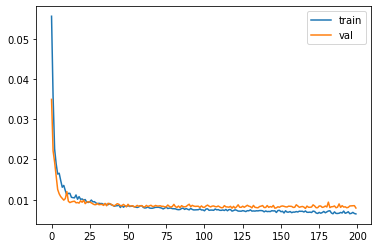

66/66 [==============================] - 1s 4ms/step


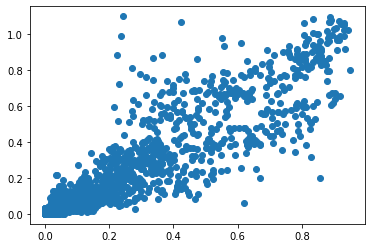

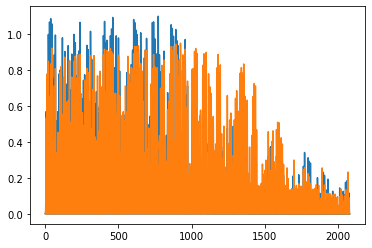

0.10470805927713796


In [66]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  #output = layers.average([ out1_1, out2_1, out3_1])
  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))

Epoch 1/200
53/53 [==============================] - 12s 44ms/step - loss: 0.0398 - mse: 0.0398 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 2/200
53/53 [==============================] - 1s 24ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 3/200
53/53 [==============================] - 1s 23ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 4/200
53/53 [==============================] - 1s 23ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 5/200
53/53 [==============================] - 1s 24ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 6/200
53/53 [==============================] - 1s 24ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 7/200
53/53 [==============================] - 1s 23ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 8/200
53/53 [==============================] - 1s 24ms/step - loss: 0

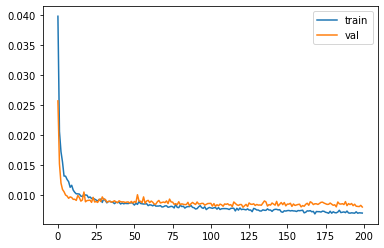

66/66 [==============================] - 1s 4ms/step


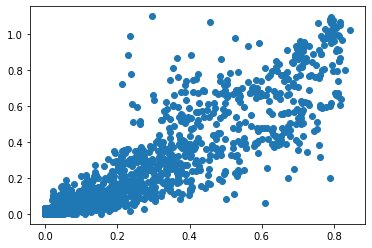

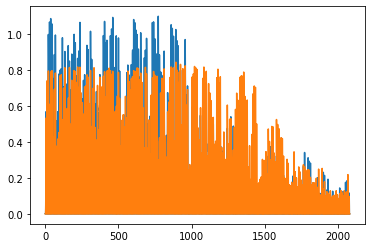

0.106448702251739


In [67]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.5)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.5)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size =64 )
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))

In [68]:
from keras.layers import Bidirectional

Epoch 1/100
53/53 [==============================] - 22s 89ms/step - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 2/100
53/53 [==============================] - 3s 49ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 3/100
53/53 [==============================] - 3s 50ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 4/100
53/53 [==============================] - 3s 49ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 5/100
53/53 [==============================] - 3s 49ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 6/100
53/53 [==============================] - 3s 49ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 7/100
53/53 [==============================] - 3s 49ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 8/100
53/53 [==============================] - 3s 50ms/step - loss: 0

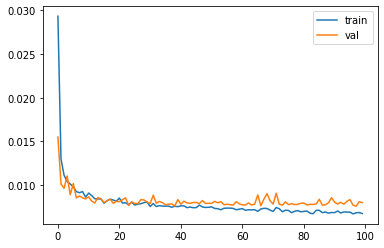

66/66 [==============================] - 2s 8ms/step


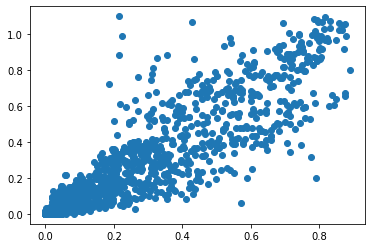

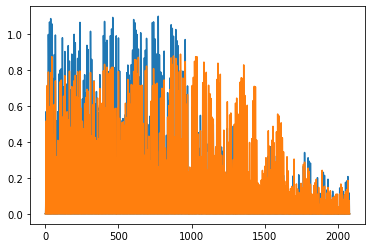

0.10432188287970075


In [69]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs =100,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))

Epoch 1/100
53/53 [==============================] - 30s 172ms/step - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 2/100
53/53 [==============================] - 3s 64ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 3/100
53/53 [==============================] - 3s 50ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 4/100
53/53 [==============================] - 3s 49ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 5/100
53/53 [==============================] - 3s 48ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 6/100
53/53 [==============================] - 3s 50ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 7/100
53/53 [==============================] - 3s 50ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 8/100
53/53 [==============================] - 3s 50ms/step - loss: 

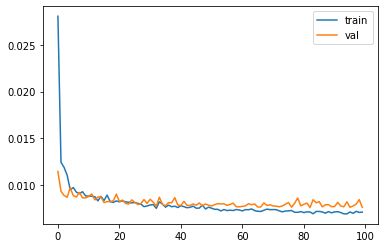

66/66 [==============================] - 2s 8ms/step


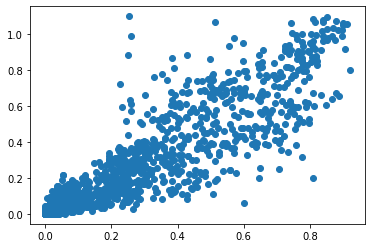

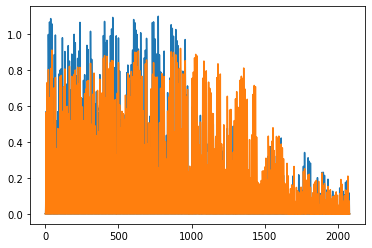

0.10125482145794823


In [71]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  #output = layers.average([ out1_1, out2_1, out3_1])
  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 100,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))